
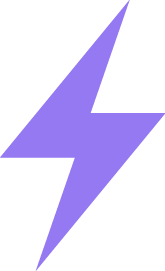

Connected to server at https://desolate-castle-4773.herokuapp.com


<IPython.core.display.Javascript object>

In [9]:
import random
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)
% matplotlib inline
import izi
reload(izi)
import pickle
from lightning import Lightning
lgn = Lightning(ipython=True, host='https://desolate-castle-4773.herokuapp.com/')
lgn.set_size(size='large')

In [10]:
import base64
from __future__ import print_function # py 2.7 compat.
import ipywidgets as widgets # Widget definitions.
from traitlets import Unicode # Traitlet needed to add synced attributes to the widget.


class FileWidget(widgets.DOMWidget):
    _view_name = Unicode('FilePickerView', sync=True)
    value = Unicode(sync=True)
    filename = Unicode(sync=True)
    
    def __init__(self, **kwargs):
        """Constructor"""
        widgets.DOMWidget.__init__(self, **kwargs) # Call the base.
        
        # Allow the user to register error callbacks with the following signatures:
        #    callback()
        #    callback(sender)
        self.errors = widgets.CallbackDispatcher(accepted_nargs=[0, 1])
        
        # Listen for custom msgs
        self.on_msg(self._handle_custom_msg)

    def _handle_custom_msg(self, content):
        """Handle a msg from the front-end.

        Parameters
        ----------
        content: dict
            Content of the msg."""
        if 'event' in content and content['event'] == 'error':
            self.errors()
            self.errors(self)
    
    


In [11]:
%%javascript

require(["widgets/js/widget", "widgets/js/manager"], function(widget, manager){

    var FilePickerView = widget.DOMWidgetView.extend({
        render: function(){
            // Render the view.
            this.setElement($('<input />')
                .attr('type', 'file'));
        },
        
        events: {
            // List of events and their handlers.
            'change': 'handle_file_change',
        },
       
        handle_file_change: function(evt) { 
            // Handle when the user has changed the file.
            
            // Retrieve the first (and only!) File from the FileList object
            var file = evt.target.files[0];
            if (file) {

                // Read the file's textual content and set value to those contents.
                var that = this;
                var file_reader = new FileReader();
                file_reader.onload = function(e) {
                    that.model.set('value', e.target.result);
                    that.touch();
                }
                file_reader.readAsText(file);
            } else {

                // The file couldn't be opened.  Send an error msg to the
                // back-end.
                this.send({ 'event': 'error' });
            }

            // Set the filename of the file.
            this.model.set('filename', file.name);
            this.touch();
        },
    });
        
    // Register the FilePickerView with the widget manager.
    manager.WidgetManager.register_widget_view('FilePickerView', FilePickerView);
});

<IPython.core.display.Javascript object>

Loading essay_total.txt
stats
number of words 2066
number of sentences 97
uniques words: 694
Difficulty 40.36 / 100 
Average sentiment 5.24868362832 (negative: 0, neutral: 5, positive: 10)

topic distribution


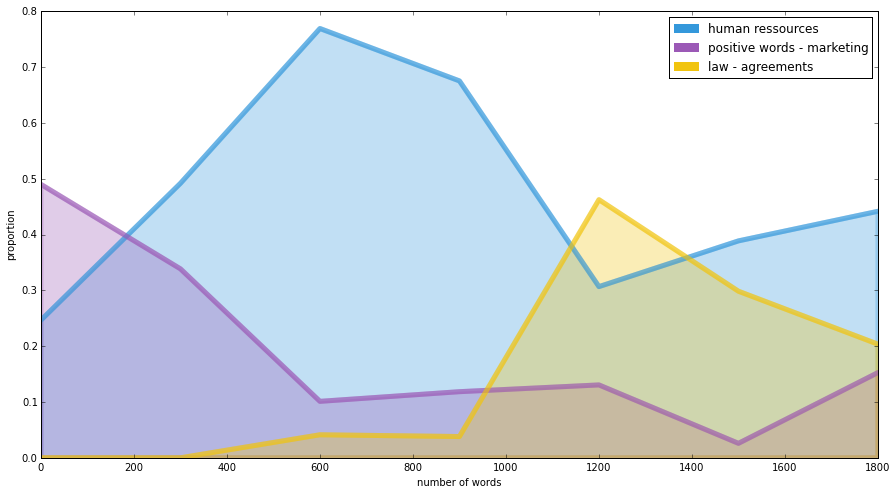

difficulty over the text 


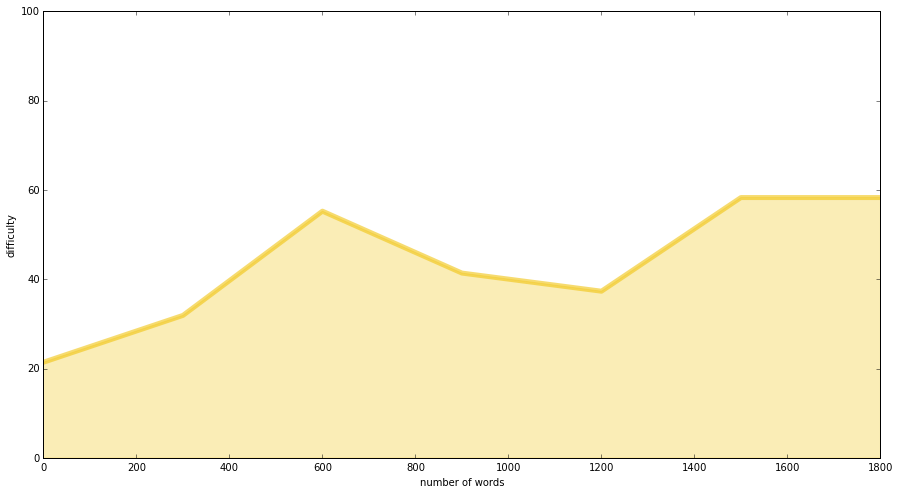

Loading essay_1.txt
stats
number of words 1047
number of sentences 49
uniques words: 360
Difficulty 40.36 / 100 
Average sentiment 5.42292841649 (negative: 0, neutral: 5, positive: 10)

topic distribution


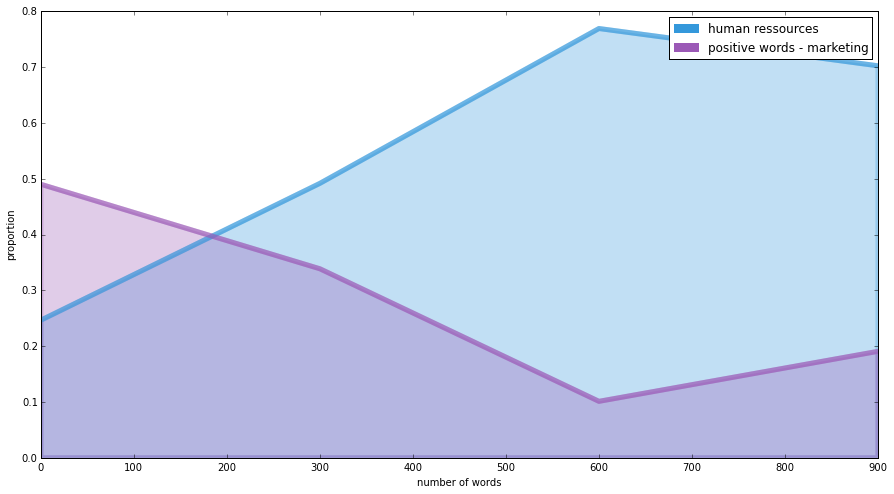

difficulty over the text 


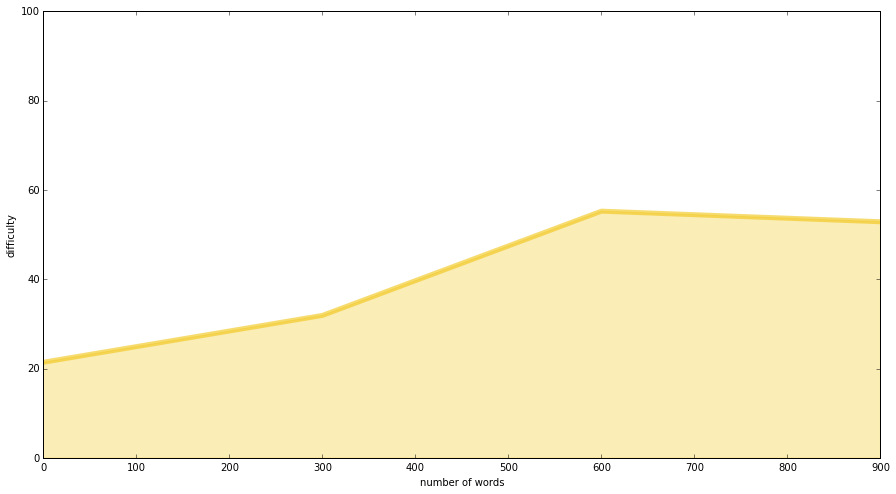

In [12]:
file_widget = FileWidget()

# Register an event to echo the filename when it has been changed.
def file_loading():
    print("Loading %s" % file_widget.filename)
file_widget.on_trait_change(file_loading, 'filename')

# Register an event to echo the filename and contents when a file
# has been uploaded.
def file_loaded():
#     print("Loaded, file contents: %s" % file_widget.value)
    izi.displayResults(file_widget.filename)
file_widget.on_trait_change(file_loaded, 'value')

# Register an event to print an error message when a file could not
# be opened.  Since the error messages are not handled through
# traitlets but instead handled through custom msgs, the registration
# of the handler is different than the two examples above.  Instead
# the API provided by the CallbackDispatcher must be used.
def file_failed():
    print("Could not load file contents of %s" % file_widget.filename)
file_widget.errors.register_callback(file_failed)

file_widget